In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlwings as xw
import os
import pulp

In [84]:
wind_traces = os.listdir(r'Draft 2024 ISP Traces\wind_2011')
solar_traces = os.listdir(r'Draft 2024 ISP Traces\solar_2011')

In [85]:
qld_wind_traces = {
    'Existing': [
        'COOPGWF1_RefYear2011.csv',
        'MEWF1_RefYear2011.csv',
        'KABANWF1_RefYear2011.csv',
        'KEPWF1_RefYear2011.csv',
        'DULAWF1_RefYear2011.csv' # Has entered since 2023 IASR
    ],

    'Committed': [
        'CLRKCWF1_RefYear2011.csv',
        'CLRKCWF2_RefYear2011.csv',
        'Wambo_RefYear2011.csv'
    ],

    'Anticipated': [
        'Macintyre_RefYear2011.csv'
    ],

    'New Entrants': [
        'Q1_WH_Far_North_QLD_RefYear2011.csv',
        'Q1_WM_Far_North_QLD_RefYear2011.csv',
        'Q2_WH_North_Qld_Clean_Energy_Hub_RefYear2011.csv',
        'Q2_WM_North_Qld_Clean_Energy_Hub_RefYear2011.csv',
        'Q3_WH_Northern_Qld_RefYear2011.csv',
        'Q3_WM_Northern_Qld_RefYear2011.csv',
        'Q4_WH_Isaac_RefYear2011.csv',
        'Q4_WM_Isaac_RefYear2011.csv',
        'Q5_WH_Barcaldine_RefYear2011.csv',
        'Q5_WM_Barcaldine_RefYear2011.csv',
        'Q6_WH_Fitzroy_RefYear2011.csv',
        'Q6_WM_Fitzroy_RefYear2011.csv',
        'Q7_WH_Wide_Bay_RefYear2011.csv',
        'Q7_WM_Wide_Bay_RefYear2011.csv',
        'Q8_WH_Darling_Downs_RefYear2011.csv',
        'Q8_WM_Darling_Downs_RefYear2011.csv',
        'Q9_WH_Banana_RefYear2011.csv',
        'Q9_WM_Banana_RefYear2011.csv'
    ]
}

In [86]:
qld_solar_traces = {

    'Existing': [
        'Western_Downs_Hub_SAT_RefYear2011.csv',
        'Columboola_SAT_RefYear2011.csv',
        'Edenvale_SAT_RefYear2011.csv',
        'Daydream_SAT_RefYear2011.csv',
        'Gangarri_SAT_RefYear2011.csv',
        'Bluegrass_SAT_RefYear2011.csv',
        'Sun_Metals_FFP_RefYear2011.csv',
        'Haughton_SAT_RefYear2011.csv',
        'Ross_River_SAT_RefYear2011.csv',
        'Darling_Downs_FFP_RefYear2011.csv',
        'Lilyvale_SAT_RefYear2011.csv',
        'Clare_SAT_RefYear2011.csv',
        'Yarranlea_SAT_RefYear2011.csv',
        'Moura_SAT_RefYear2011.csv',
        'Clermont_SAT_RefYear2011.csv',
        'Susan_River_SAT_RefYear2011.csv',
        'Emerald_SAT_RefYear2011.csv',
        'Rugby_Run_SAT_RefYear2011.csv',
        'Childers_SAT_RefYear2011.csv',
        'Warwick_One_SAT_RefYear2011.csv',
        'Warwick_Two_SAT_RefYear2011.csv',
        'Hayman_SAT_RefYear2011.csv',
        'Hamilton_SAT_RefYear2011.csv',
        'Whitsunday_SAT_RefYear2011.csv',
        'Oakey_One_FFP_RefYear2011.csv',
        'Oakey_Two_SAT_RefYear2011.csv',
        'Kidston_FFP_RefYear2011.csv',
        'Collinsville_FFP_RefYear2011.csv',
        'Maryrorough_SAT_RefYear2011.csv',
        'Middlemount_SAT_RefYear2011.csv',
        'Hughenden_SAT_RefYear2011.csv',
        'Kennedy_SAT_RefYear2011.csv',
        'Longreach_SAT_RefYear2011.csv'
    ],

    'Committed': [
        'Woolooga_SAT_RefYear2011.csv',
        'Wandoan_SAT_RefYear2011.csv'
    ],

    'Anticipated': [
        'Aramara_SAT_RefYear2011.csv',
        'Munna_Creek_SAT_RefYear2011.csv'
    ],

    'New Entrants': [
        'REZ_Q1_Far_North_QLD_CST_RefYear2011.csv',
        'REZ_Q1_Far_North_QLD_SAT_RefYear2011.csv',
        'REZ_Q2_North_Qld_Clean_Energy_Hub_CST_RefYear2011.csv',
        'REZ_Q2_North_Qld_Clean_Energy_Hub_SAT_RefYear2011.csv',
        'REZ_Q3_Northern_Qld_CST_RefYear2011.csv',
        'REZ_Q3_Northern_Qld_SAT_RefYear2011.csv',
        'REZ_Q4_Isaac_CST_RefYear2011.csv',
        'REZ_Q4_Isaac_SAT_RefYear2011.csv',
        'REZ_Q5_Barcaldine_CST_RefYear2011.csv',
        'REZ_Q5_Barcaldine_SAT_RefYear2011.csv',
        'REZ_Q6_Fitzroy_CST_RefYear2011.csv',
        'REZ_Q6_Fitzroy_SAT_RefYear2011.csv',
        'REZ_Q7_Wide_Bay_CST_RefYear2011.csv',
        'REZ_Q7_Wide_Bay_SAT_RefYear2011.csv',
        'REZ_Q8_Darling_Downs_CST_RefYear2011.csv',
        'REZ_Q8_Darling_Downs_SAT_RefYear2011.csv',
        'REZ_Q9_Banana_CST_RefYear2011.csv',
        'REZ_Q9_Banana_SAT_RefYear2011.csv'      
    ]
}

### Define Inputs

In [87]:
wind_capacity = 1023
solar_capacity = 3433.78

traces = {
    'Wind_Normalised':'Draft 2024 ISP Traces\COOPGWF1_RefYear2011.csv',
    'Solar_Normalised':'Draft 2024 ISP Traces\Western_Downs_Hub_SAT_RefYear2011.csv',
    'Demand_MW':'Draft 2024 ISP Traces\QLD_RefYear_2011_STEP_CHANGE_POE50_OPSO_MODELLING.csv'
}

### Reformat Traces

In [88]:
def process_trace(trace: str): 

    path = traces[trace]

    # Load the data and convert it to a long format
    df = pd.read_csv(path).melt(id_vars=['Year', 'Month', 'Day'], var_name='Interval', value_name='MW')

    # Convert year, mon, day and interval to a datetime
    df['IntervalStart'] = pd.to_datetime(df[['Year', 'Month', 'Day']]) + pd.to_timedelta((df['Interval'].astype(int) - 1) * 30, unit='m')
    df['IntervalEnd'] = df['IntervalStart'] + pd.to_timedelta(30, unit='m')

    # Drop the columns that are no longer needed
    df = df[['IntervalEnd', 'MW']]
    df = df.rename(columns={'MW': trace})

    return df

In [89]:
wind_df = process_trace('Wind_Normalised')
solar_df = process_trace('Solar_Normalised')
demand_df = process_trace('Demand_MW')

In [90]:
# Combine wind, solar and demand data
df = demand_df.merge(wind_df, on=['IntervalEnd'], how='left').merge(solar_df, on=['IntervalEnd'], how='left')
df = df.sort_values('IntervalEnd').reset_index(drop=True)

### Subtract VRE from Operational Demand 

In [91]:
df['Wind_MW'] = df['Wind_Normalised'] * wind_capacity
df['Solar_MW'] = df['Solar_Normalised'] * solar_capacity

df['Residual_Demand'] = df['Demand_MW'] - df['Wind_MW'] - df['Solar_MW']    

### Select Only Sample Week

In [92]:
sample_df = df.loc[(df['IntervalEnd'].dt.year == 2024) & (df['IntervalEnd'].dt.month == 2)]

In [93]:
sample_df

,IntervalEnd,Demand_MW,Wind_Normalised,Solar_Normalised,Wind_MW,Solar_MW,Residual_Demand
10319,2024-02-01 00:00:00,5836.066077,0.616920,0.0,631.109160,0.0,5204.956917
10320,2024-02-01 00:30:00,5614.449492,0.639597,0.0,654.307731,0.0,4960.141761
10321,2024-02-01 01:00:00,5460.212123,0.553940,0.0,566.680620,0.0,4893.531503
10322,2024-02-01 01:30:00,5290.038292,0.525484,0.0,537.570132,0.0,4752.468160
10323,2024-02-01 02:00:00,5181.450908,0.477682,0.0,488.668686,0.0,4692.782222
...,...,...,...,...,...,...,...
11706,2024-02-29 21:30:00,8845.318750,0.001775,0.0,1.815825,0.0,8843.502925
11707,2024-02-29 22:00:00,8433.090700,0.001542,0.0,1.577466,0.0,8431.513234
11708,2024-02-29 22:30:00,8158.779548,0.000441,0.0,0.451143,0.0,8158.328405
11709,2024-02-29 23:00:00,7835.724701,0.000000,0.0,0.000000,0.0,7835.724701


### Plot Results

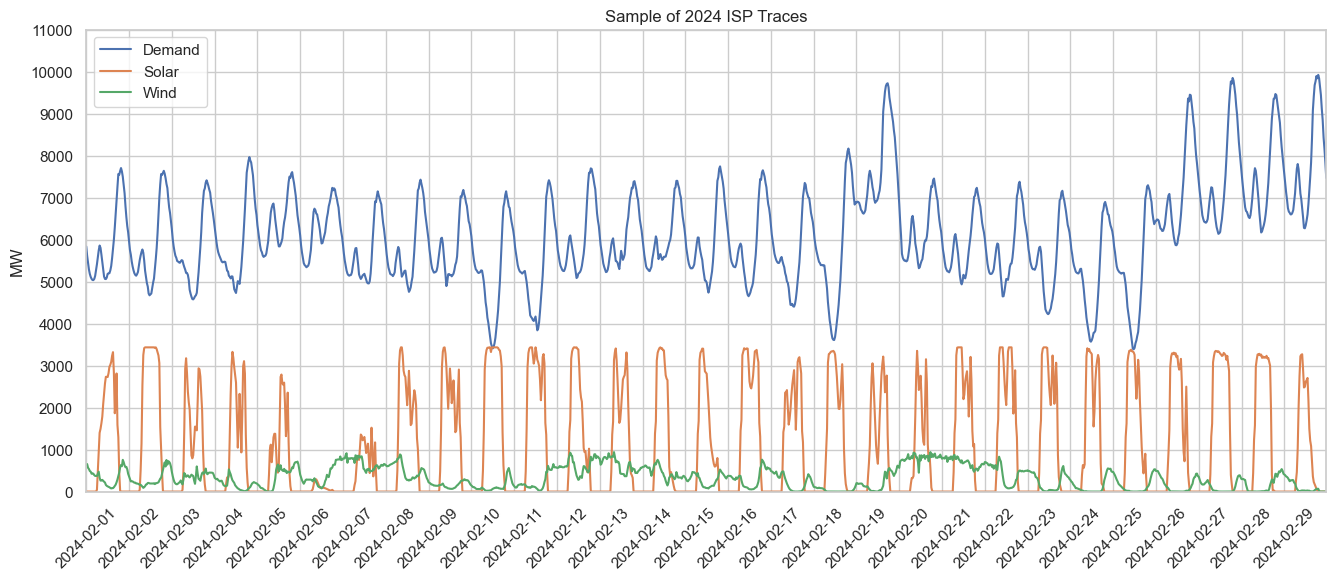

In [97]:
sample_df = sample_df.sort_values('IntervalEnd')

sns.set_theme(style='whitegrid')

# Format Plot
plt.figure(figsize=(16, 6))
plt.title('Sample of 2024 ISP Traces')
plt.xlim(sample_df['IntervalEnd'].min(), sample_df['IntervalEnd'].max())
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.ylim(0, 11000)
plt.yticks(np.arange(0, 11000+1, 1000))

# Plot the data
sns.lineplot(sample_df, x='IntervalEnd', y='Demand_MW', label='Demand')
sns.lineplot(sample_df, x='IntervalEnd', y='Solar_MW', label='Solar')
sns.lineplot(sample_df, x='IntervalEnd', y='Wind_MW', label='Wind')

plt.legend()

plt.xlabel('')
plt.ylabel('MW')

plt.show()

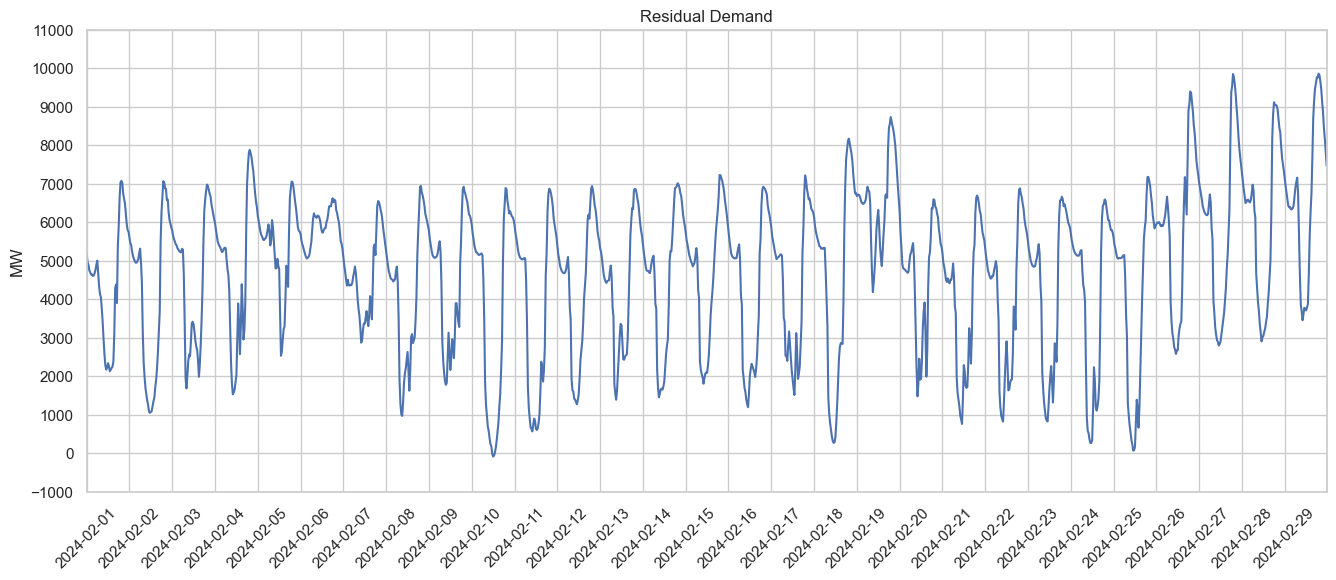

In [100]:
sample_df = sample_df.sort_values('IntervalEnd')

sns.set_theme(style='whitegrid')

# Format Plot
plt.figure(figsize=(16, 6))
plt.title('Residual Demand')
plt.xlim(sample_df['IntervalEnd'].min(), sample_df['IntervalEnd'].max())
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.ylim(-1000, 10000)
plt.yticks(np.arange(-1000, 11000+1, 1000))

# Plot the data
sns.lineplot(sample_df, x='IntervalEnd', y='Residual_Demand')

plt.xlabel('')
plt.ylabel('MW')

plt.show()